# CGMF Summary File Analyzer

<font size=4em color="darkblue">Austin Carter<sup>a,b</sup>, Patrick Talou<sup>a</sup>, Ionel Stetcu<sup>a</sup></font> <br />
<sup>a</sup>Los Alamos National Laboratory <br />
<sup>b</sup>University of Michigan<br />

<a href="mailto:austinlc@umich.edu">austinlc@umich.edu</a>

In [1]:
import numpy as np
import scipy as sp
import os
from statistics import *
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
%matplotlib inline

In [2]:
# Define summary file path and modify if necessary
summary_file_path = os.path.join(os.getcwd(),"Summary.txt")
if os.path.isfile(summary_file_path):
    useSummary = input("Summary.txt exists in cwd. Use this file? Yes/No: ")
    if not(useSummary == "Yes" or useSummary =="yes" or useSummary =='y' or useSummary =='Y'):
        summary_file_name = input("Please Specify Summary File Name in cwd (with extension): ")
        summary_file_path = os.path.join(os.getcwd(),summary_file_name)
else:
    summary_file_name = input("Please Specify Summary File Name in cwd (with extension): ")
    summary_file_path = os.path.join(os.getcwd(),summary_file_name)

Summary.txt exists in cwd. Use this file? Yes/No: Yes


In [12]:
# get data from summary file

open_file = open(summary_file_path)
lines = open_file.readlines()
currentline = 6
filenames, nHist, TXE, TXEu, TKE, TKEu, J, Ju, nn, nnm2, nnm3, ng, ngm2, ngm3, En, Enu, Eg, Egu = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
while True:
    data = lines[currentline].split()
    filenames.append(data[0])
    nHist.append(data[1])
    TXE.append(data[2])
    TXEu.append(data[3])
    TKE.append(data[4])
    TKEu.append(data[5])
    J.append(data[6])
    Ju.append(data[7])
    nn.append(data[8])
    nnm2.append(data[9])
    nnm3.append(data[10])
    ng.append(data[11])
    ngm2.append(data[12])
    ngm3.append(data[13])
    En.append(data[14])
    Enu.append(data[15])
    Eg.append(data[16])
    Egu.append(data[17])
    currentline += 1
    if currentline == len(lines):
        break

In [2]:
#-- YOU COULD SIMPLIFY THIS BY WRITING: 
#-- "In Summary2/3.txt", I added "#" for the first few comment lines; numpy ignores those lines by default 
i, nevents, TXE, TXEu, TKE, TKEu, J, Ju, nn, nnm2, nnm3, ng, ngm2, ngm3, En, Enu, Eg, Egu = np.loadtxt("Summary3.txt",unpack=True)

[ 3.875  3.882  3.875  3.857]
[ -0.09772664  21.94820753]
[ -0.09772664  21.94820753]


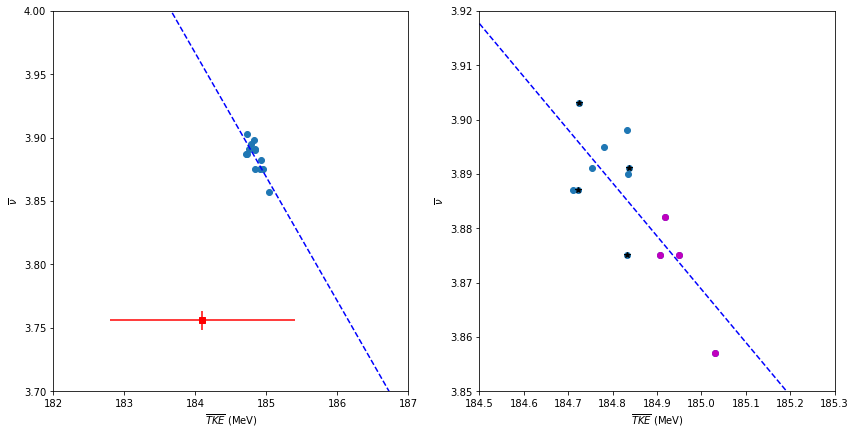

In [37]:
#-- IT'S BETTER THIS WAY BECAUSE YOU CAN NOW APPLY MASKS...

mask = np.logical_and(TKE>184.9,TKE<185.1)
nn1 = nn[mask]
print (nn1)

mask2 = ng>9.5

#-- and then you can plot interesting things...
fig = plt.figure(figsize=(14,7))

plt.subplot(1,2,1,xlabel=r"$\overline{TKE}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.xlim(182.0,187.)
plt.ylim(3.7,4.00)
plt.plot(TKE, nn, 'o')
fit = np.polyfit(TKE,nn,1)
print (fit)
fitfun = np.poly1d(fit)
x=np.linspace(182,188,61)
plt.plot(x,fitfun(x),'b--')
plt.errorbar(184.1,3.756,xerr=1.3,yerr=0.002*3.756,fmt='rs') #-- experimental point

plt.subplot(1,2,2,xlabel=r"$\overline{TKE}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.xlim(184.5,185.3)
plt.ylim(3.85,3.92)
plt.plot(TKE, nn, 'o')
plt.plot(TKE[mask], nn1, 'mo')
plt.plot(TKE[mask2],nn[mask2],'k*')
fit = np.polyfit(TKE,nn,1)
print (fit)
fitfun = np.poly1d(fit)
x=np.linspace(182,188,61)
plt.plot(x,fitfun(x),'b--')
plt.errorbar(184.1,3.756,xerr=1.3,yerr=0.002*3.756,fmt='rs') #-- experimental point

plt.show()


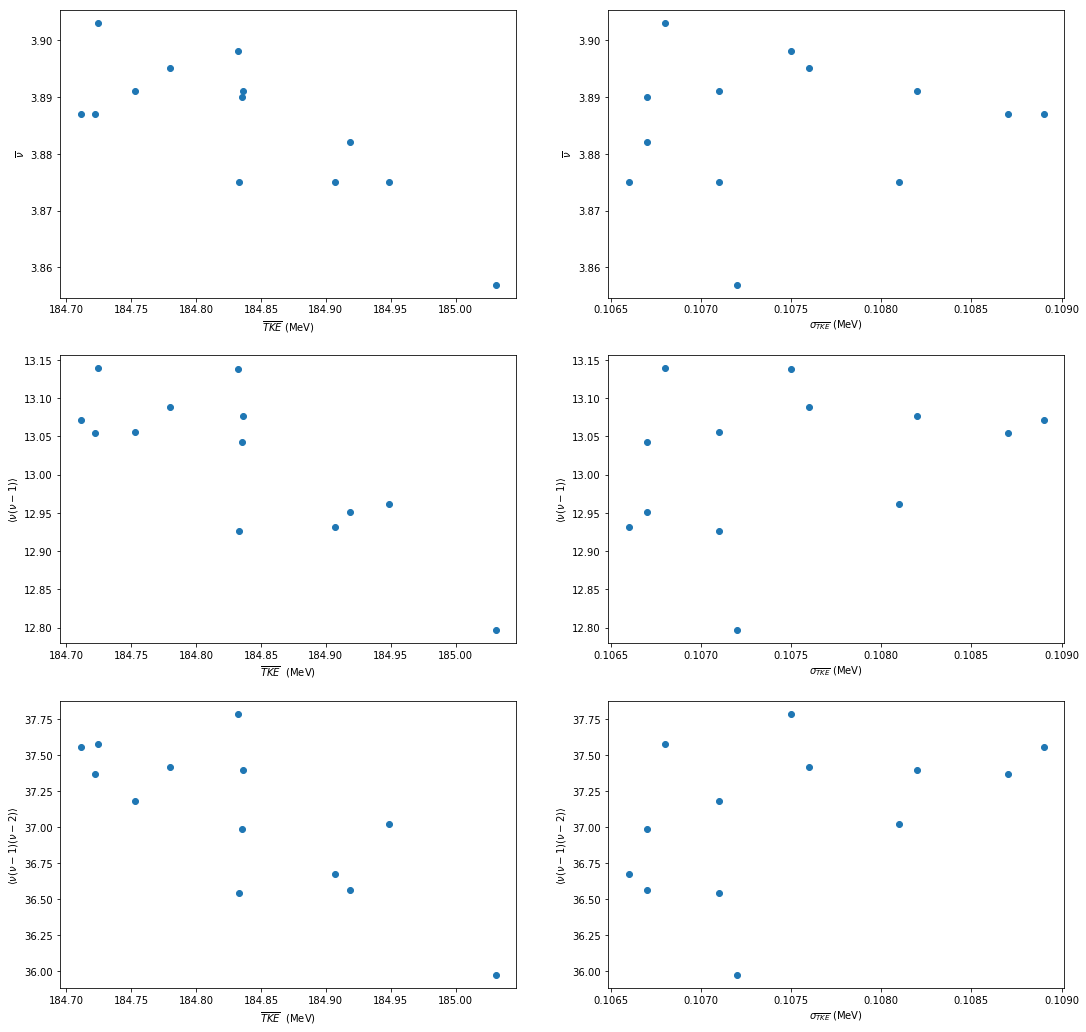

In [23]:
# Plot nn vs tke and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1,xlabel=r"$\overline{TKE}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.plot(TKE, nn, 'o')

plt.subplot(3,2,2,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.plot(TKEu, nn, 'o')

plt.subplot(3,2,3,xlabel=r"$\overline{TKE}$  (MeV)",ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(TKE, nnm2, 'o')

plt.subplot(3,2,4,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(TKEu, nnm2, 'o')

plt.subplot(3,2,5,xlabel=r"$\overline{TKE}$  (MeV)",ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(TKE, nnm3, 'o')

plt.subplot(3,2,6,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(TKEu, nnm3, 'o')

plt.show() #-- avoids the [<matplolib...>] printed line

[ 0.10891313  0.26848252]


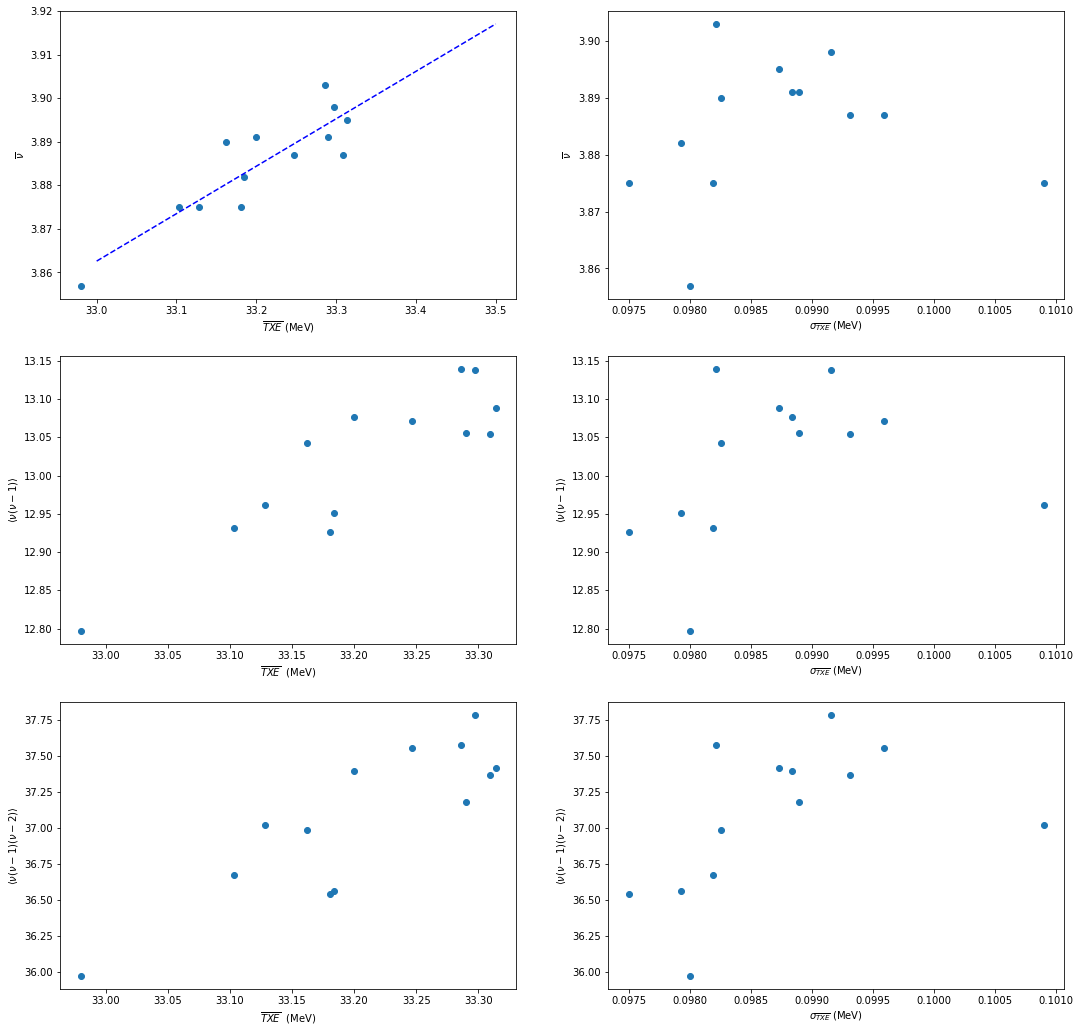

In [7]:
# Plot nn vs txe and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1,xlabel=r"$\overline{TXE}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.plot(TXE, nn, 'o')
fit = np.polyfit(TXE,nn,1)
print (fit)
fitfun = np.poly1d(fit)
x=np.linspace(33,33.5,61)
plt.plot(x,fitfun(x),'b--')


plt.subplot(3,2,2,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.plot(TXEu, nn, 'o')

plt.subplot(3,2,3,xlabel=r"$\overline{TXE}$  (MeV)",ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(TXE, nnm2, 'o')

plt.subplot(3,2,4,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(TXEu, nnm2, 'o')

plt.subplot(3,2,5,xlabel=r"$\overline{TXE}$  (MeV)",ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(TXE, nnm3, 'o')

plt.subplot(3,2,6,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(TXEu, nnm3, 'o')

plt.show()

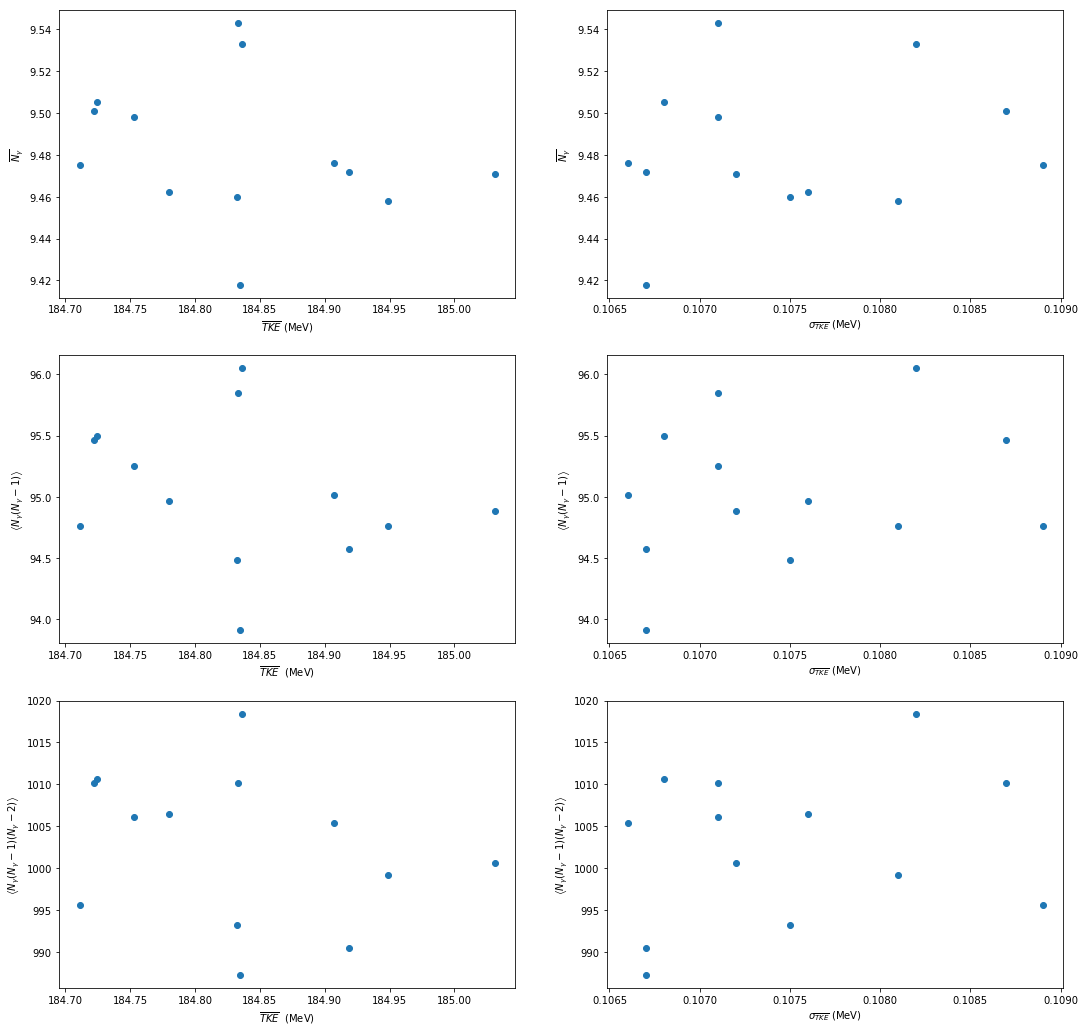

In [48]:
# Plot ng vs tke and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1,xlabel=r"$\overline{TKE}$ (MeV)",ylabel=r'$\overline{N_{\gamma}}$') 
plt.plot(TKE, ng, 'o')

plt.subplot(3,2,2,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\overline{N_{\gamma}}$') 
plt.plot(TKEu, ng, 'o')

plt.subplot(3,2,3,xlabel=r"$\overline{TKE}$  (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(TKE, ngm2, 'o')

plt.subplot(3,2,4,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(TKEu, ngm2, 'o')

plt.subplot(3,2,5,xlabel=r"$\overline{TKE}$  (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(TKE, ngm3, 'o')

plt.subplot(3,2,6,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(TKEu, ngm3, 'o')

plt.show()

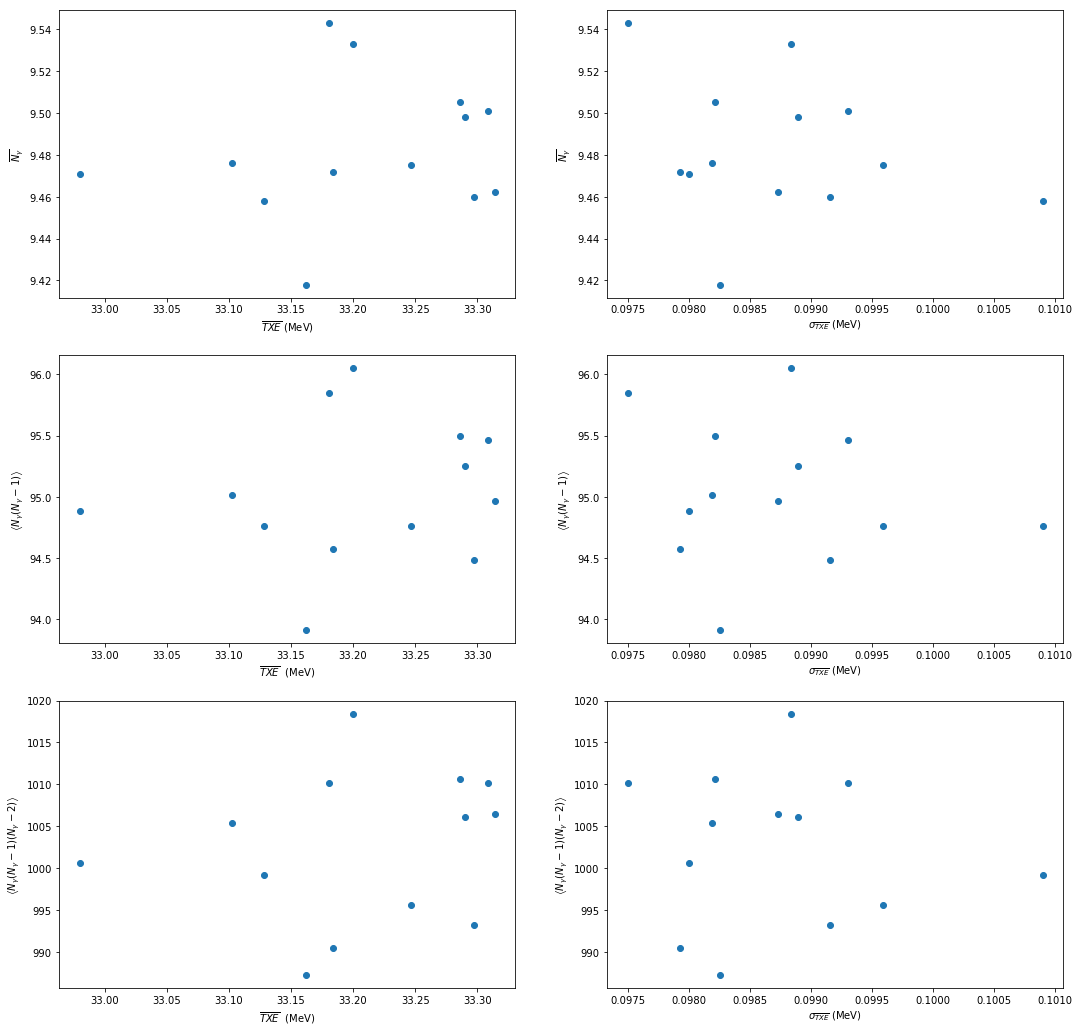

In [49]:
# Plot ng vs tke and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1,xlabel=r"$\overline{TXE}$ (MeV)",ylabel=r'$\overline{N_{\gamma}}$') 
plt.plot(TXE, ng, 'o')

plt.subplot(3,2,2,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\overline{N_{\gamma}}$') 
plt.plot(TXEu, ng, 'o')

plt.subplot(3,2,3,xlabel=r"$\overline{TXE}$  (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(TXE, ngm2, 'o')

plt.subplot(3,2,4,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(TXEu, ngm2, 'o')

plt.subplot(3,2,5,xlabel=r"$\overline{TXE}$  (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(TXE, ngm3, 'o')

plt.subplot(3,2,6,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(TXEu, ngm3, 'o')

plt.show()

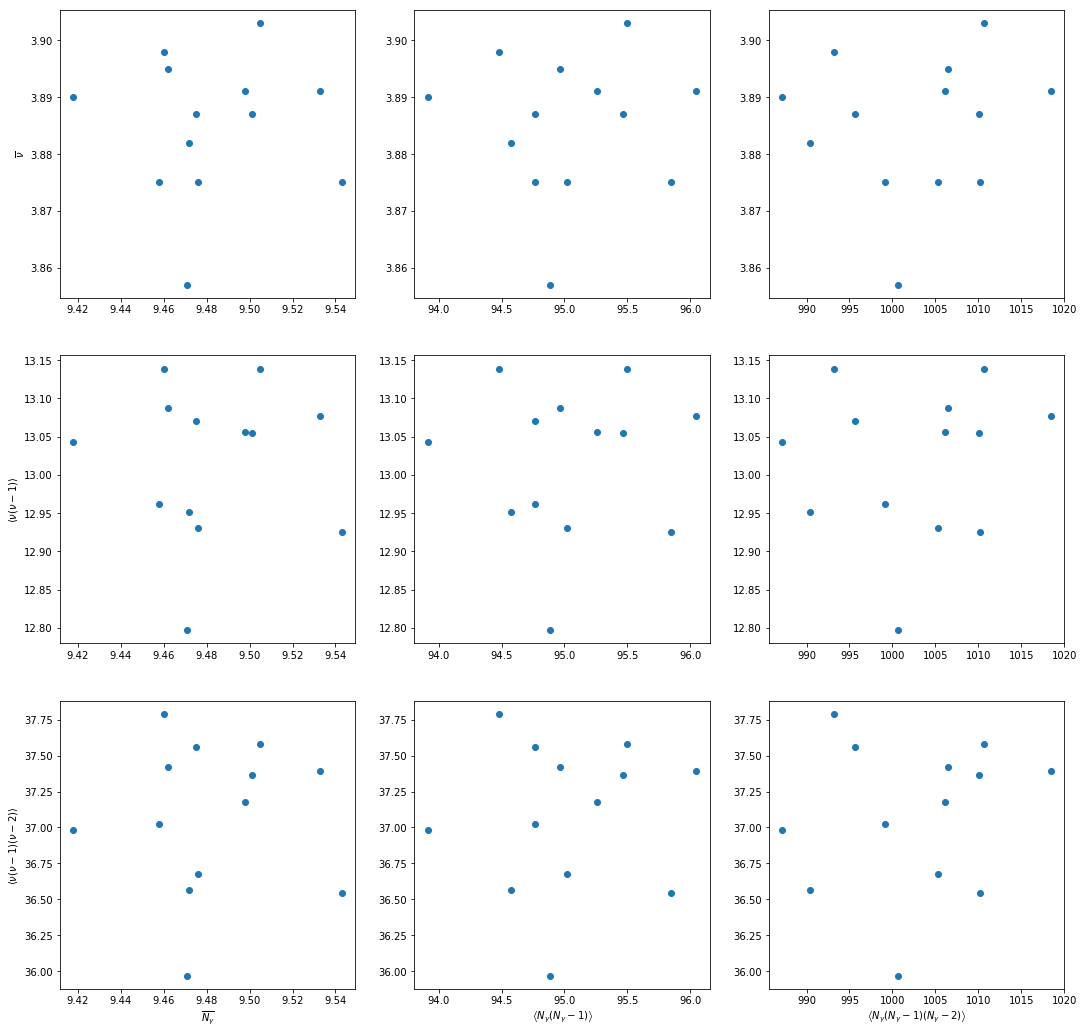

In [50]:
# Plot ng vs tke and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,3,1,ylabel=r'$\overline{\nu}$') 
plt.plot(ng, nn, 'o')

plt.subplot(3,3,2) 
plt.plot(ngm2, nn, 'o')

plt.subplot(3,3,3) 
plt.plot(ngm3, nn, 'o')

plt.subplot(3,3,4,ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(ng, nnm2, 'o')

plt.subplot(3,3,5) 
plt.plot(ngm2, nnm2, 'o')

plt.subplot(3,3,6) 
plt.plot(ngm3, nnm2, 'o')

plt.subplot(3,3,7,xlabel=r'$\overline{N_{\gamma}}$',ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(ng, nnm3, 'o')

plt.subplot(3,3,8,xlabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(ngm2, nnm3, 'o')

plt.subplot(3,3,9,xlabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(ngm3, nnm3, 'o')

plt.show()

In [52]:
for i in range(len(TKE)):
    print(str(TKE[i]))
    
#-- or, more "pythonic" ;-)
print (TKE)

184.949
184.711
184.836
184.919
184.753
184.724
184.835
184.78
184.832
184.833
184.907
185.031
184.722
[ 184.949  184.711  184.836  184.919  184.753  184.724  184.835  184.78
  184.832  184.833  184.907  185.031  184.722]
